
 best s= 180 best S= 230 Maximum average daily revenue= 190437.54982888472


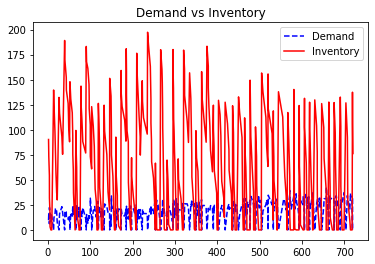

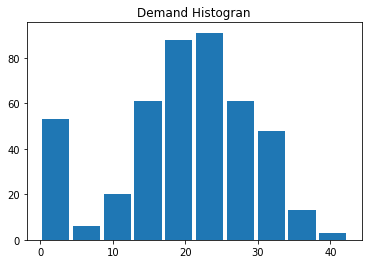

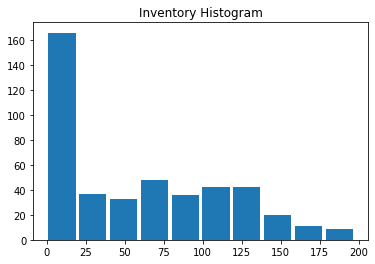

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 24 15:34:10 2020

@author: Omid Arhami

An Inventory Model: (s, S) ordering policy

"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# r : selling price
# h : inventory holding cost per unit item per unit time.

# Demand for this product appears in accordance with a Poisson process with rate λ
# The amount demanded by each customer is a random variable having distribution G.

# The cost of ordering y units of the product is a specified function c(y),
# It takes L units of time until the order is delivered.

# ** whenever a customer demands more of the product than is presently
# available, then the amount on hand is sold and the remainder of the order 
# is lost.


# Variables:
# Time variable:
#   t

# System state:
#   x : the amount of inventory on hand
#   y : the amount on order

# Counter variables:
#     C, the total amount of ordering costs by time t
#     H, the total amount of inventory holding costs by time t
#     R, the total amount of revenue earned by time t

# Event list:
#   tA # Customer arrival time
#   tO # Order arrival time

# Returns the first poisson occurance time after t with rate lam:
def tA_Gen(t, lam):
    u = np.random.rand()
    t = t - np.log(u)/lam
    return(t)
    

def demand(t):
    return( np.maximum(0, 15 + 5*np.random.randn()) + t*0.02)


# First we simulate over various s and S to find the best pair:
numsim = 9
result = []
for s in range(20, 200, 10):
    for S in range(s+10, s+400, 20):
        final_revenue = 0
        for sim in range(numsim) :
            # Initializing: (Time unit is hour)
            period_length = 24*30
            C = 0
            H = 0
            R = 0
            h = 40
            r = 2500
            c = 1500
            #s = 50
            #S = 120
            
            x = 100
            y = 0
            L = 12
            lam = 0.5
            t = 0
            tO = np.Infinity
            tA = tA_Gen(t, lam)
            
            T = []
            D = []
            X = []
            Y =[]
            
            while t < period_length :
                
                if tA < tO :
                    H += (tA - t)*x*h
                    t = tA
                    d = demand(t)
                    w = np.minimum(x, d)
                    R += w*r
                    x -= w
                    if (x < s) & (y == 0):
                        y = S - x
                        tO = t + L
                    tA = tA_Gen(t, lam)
                    T.append(t)
                    D.append(d)
                    X.append(x)
                    
                if tO < tA :
                    H += (tO - t)*x*h
                    C += y*c
                    t = tO
                    x += y
                    y = 0
                    tO = np.Infinity
                    T.append(t)
                    D.append(0)
                    X.append(x)
                
            
            final_revenue += (R - C - H)/30/numsim
        
        result.append([s, S, final_revenue])
        #print("s=", s,"S=", S, "average daily revenue=", final_revenue)


# Saving the best s and S:
result = pd.DataFrame(result)
s = int( result[0][ result[2] == np.max(result[2]) ] )
S = int( result[1][ result[2] == np.max(result[2]) ] )


# Now simulate with the best s-S :
# Initializing: (Time unit is hour)
period_length = 24*30
C = 0
H = 0
R = 0
h = 10
r = 2500
c = 1500
x = 100
y = 0
L = 12
lam = 0.5
t = 0
tO = np.Infinity
tA = tA_Gen(t, lam)

T = []
D = []
X = []
Y =[]

while t < period_length :
    
    if tA < tO :
        H += (tA - t)*x*h
        t = tA
        d = demand(t)
        w = np.minimum(x, d)
        R += w*r
        x -= w
        if (x < s) & (y == 0):
            y = S - x
            tO = t + L
        tA = tA_Gen(t, lam)
        T.append(t)
        D.append(d)
        X.append(x)
        #Y.append(y)
        
    if tO < tA :
        H += (tO - t)*x*h
        C += y*c
        t = tO
        x += y
        y = 0
        tO = np.Infinity
        T.append(t)
        D.append(0)
        X.append(x)
        #Y.append(y)
    

final_revenue = (R - C - H)/30
result.append([s, S, final_revenue])
print("\n","best s=", s,"best S=", S, "Maximum average daily revenue=", final_revenue)


# Plots:
ax_x = np.linspace(0, period_length, 10*period_length)

plt.figure(1)
plt.plot(T, D, "b--", label="Demand")
plt.plot(T, X, "r-", label="Inventory")
plt.legend()
plt.title("Demand vs Inventory")

plt.figure(2)
plt.hist(D, rwidth=0.88)
plt.title("Demand Histogran")

plt.figure(3)
plt.hist(X, rwidth= 0.88)
plt.title("Inventory Histogram")

plt.show()
